# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

Esse código reproduz o modelo de regressão linear entre a proporção da gorjeta (tip_pct) e o valor líquido da conta (net_bill)
Ele mostra como a proporção da gorjeta varia com o valor da conta, tanto numericamente (via regressão) quanto graficamente.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     58.01
Date:                Wed, 29 Oct 2025   Prob (F-statistic):           5.98e-13
Time:                        13:51:43   Log-Likelihood:                 364.24
No. Observations:                 242   AIC:                            -724.5
Df Residuals:                     240   BIC:                            -717.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2401      0.008     30.023      0.0

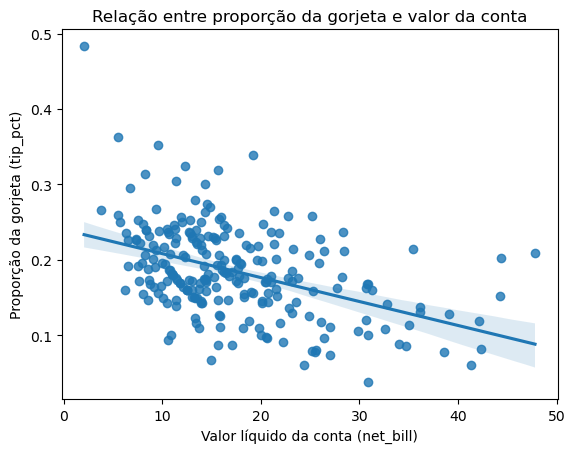

In [1]:
# 1. Importar pacotes
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# 2. Carregar a base
tips = sns.load_dataset('tips')

# 3. Criar variável auxiliar (caso ainda não exista)
tips['net_bill'] = tips['total_bill'] - tips['size']  # se já existir, pule esta linha
tips['tip_pct'] = tips['tip'] / tips['net_bill']

# 4. Filtrar outliers
df = tips[tips['tip_pct'] < 0.5].copy()

# 5. Ajustar o modelo de regressão tip_pct ~ net_bill
X = sm.add_constant(df['net_bill'])
y = df['tip_pct']
reg = sm.OLS(y, X).fit()

# 6. Exibir resumo
print(reg.summary())

# 7. Plotar o gráfico de dispersão + regressão
sns.regplot(y='tip_pct', x='net_bill', data=df)
plt.title('Relação entre proporção da gorjeta e valor da conta')
plt.xlabel('Valor líquido da conta (net_bill)')
plt.ylabel('Proporção da gorjeta (tip_pct)')
plt.show()

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

Esse código ajusta um modelo de regressão linear entre a proporção da gorjeta (tip_pct) e o logaritmo do valor líquido da conta (log(net_bill))

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     76.85
Date:                Wed, 29 Oct 2025   Prob (F-statistic):           3.44e-16
Time:                        13:51:44   Log-Likelihood:                 371.65
No. Observations:                 242   AIC:                            -739.3
Df Residuals:                     240   BIC:                            -732.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3553      0.020     18.042   

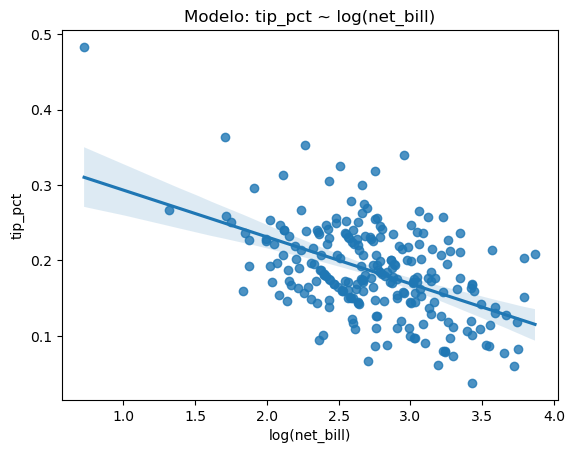

In [2]:
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar a base (por exemplo, a do seaborn)
tips = sns.load_dataset('tips')

# Criar colunas auxiliares
tips['net_bill'] = tips['total_bill'] - tips['size']   # ou o cálculo que você já usa
tips['tip_pct'] = tips['tip'] / tips['net_bill']

# Filtrar outliers
df = tips[tips['tip_pct'] < 0.5].copy()

# Criar a variável log-transformada
df['log_net_bill'] = np.log(df['net_bill'])

# Ajustar o modelo: tip_pct ~ log(net_bill)
X = sm.add_constant(df['log_net_bill'])
y = df['tip_pct']
reg_log = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(reg_log.summary())

# Visualizar o ajuste
sns.regplot(y='tip_pct', x='log_net_bill', data=df)
plt.title('Modelo: tip_pct ~ log(net_bill)')
plt.xlabel('log(net_bill)')
plt.ylabel('tip_pct')
plt.show()

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

Esse código ajusta um modelo polinomial de segundo grau para explicar a proporção da gorjeta (tip_pct) em função do valor líquido da conta (net_bill).

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     34.25
Date:                Wed, 29 Oct 2025   Prob (F-statistic):           8.32e-14
Time:                        13:51:45   Log-Likelihood:                 368.54
No. Observations:                 242   AIC:                            -731.1
Df Residuals:                     239   BIC:                            -720.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2813      0.016     17.502      0.0

C:\Users\brunn\AppData\Local\Temp\ipykernel_38300\1681883725.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred = reg_poly.params[0] + reg_poly.params[1]*x_seq + reg_poly.params[2]*x_seq**2


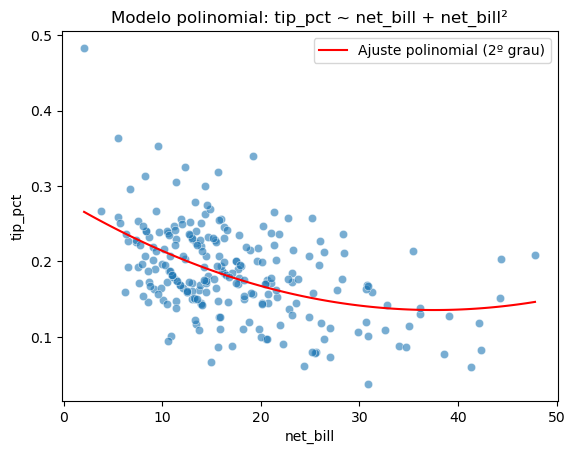

In [3]:
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar a base (exemplo com dataset 'tips')
tips = sns.load_dataset('tips')

# Criar variáveis auxiliares
tips['net_bill'] = tips['total_bill'] - tips['size']   # ou conforme sua definição
tips['tip_pct'] = tips['tip'] / tips['net_bill']

# Filtrar outliers
df = tips[tips['tip_pct'] < 0.5].copy()

# Criar as variáveis polinomiais
df['net_bill2'] = df['net_bill'] ** 2

# Ajustar o modelo polinomial: tip_pct ~ net_bill + net_bill²
X = sm.add_constant(df[['net_bill', 'net_bill2']])
y = df['tip_pct']
reg_poly = sm.OLS(y, X).fit()

# Exibir resumo
print(reg_poly.summary())

# Gráfico da curva ajustada
sns.scatterplot(x='net_bill', y='tip_pct', data=df, alpha=0.6)
x_seq = np.linspace(df['net_bill'].min(), df['net_bill'].max(), 100)
y_pred = reg_poly.params[0] + reg_poly.params[1]*x_seq + reg_poly.params[2]*x_seq**2
plt.plot(x_seq, y_pred, color='red', label='Ajuste polinomial (2º grau)')
plt.xlabel('net_bill')
plt.ylabel('tip_pct')
plt.legend()
plt.title('Modelo polinomial: tip_pct ~ net_bill + net_bill²')
plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

Esse código ajusta um modelo logarítmico na variável dependente. Ou seja, ele modela o logaritmo de tip_pct em função de net_bill.

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     65.67
Date:                Wed, 29 Oct 2025   Prob (F-statistic):           2.72e-14
Time:                        13:51:45   Log-Likelihood:                -61.678
No. Observations:                 242   AIC:                             127.4
Df Residuals:                     240   BIC:                             134.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4037      0.046    -30.200      0.0

C:\Users\brunn\AppData\Local\Temp\ipykernel_38300\1747526469.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred_log = reg_logy.params[0] + reg_logy.params[1]*x_seq


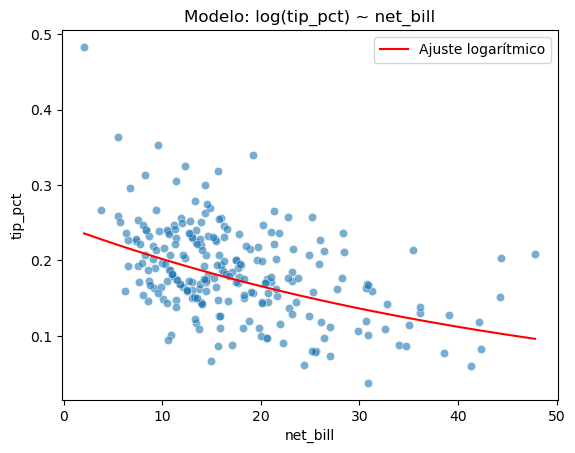

In [4]:
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Carregar e preparar os dados
tips = sns.load_dataset('tips')
tips['net_bill'] = tips['total_bill'] - tips['size']   # ou conforme a sua definição
tips['tip_pct'] = tips['tip'] / tips['net_bill']

df = tips[tips['tip_pct'] < 0.5].copy()

# 2. Criar variável log-transformada da resposta
df['log_tip_pct'] = np.log(df['tip_pct'])

# 3. Ajustar modelo: log(tip_pct) ~ net_bill
X = sm.add_constant(df['net_bill'])
y = df['log_tip_pct']
reg_logy = sm.OLS(y, X).fit()

print(reg_logy.summary())

# 4. Obter valores preditos e transformar de volta
df['pred_log_tip_pct'] = reg_logy.fittedvalues
df['pred_tip_pct'] = np.exp(df['pred_log_tip_pct'])  # voltando à escala original

# 5. Calcular R² em termos de tip_pct
SSE = np.sum((df['tip_pct'] - df['pred_tip_pct'])**2)
SST = np.sum((df['tip_pct'] - df['tip_pct'].mean())**2)
R2_tip_pct = 1 - SSE/SST

print("R² do modelo em termos de tip_pct (após ajuste no log):", R2_tip_pct)

# 6. Visualizar o ajuste
sns.scatterplot(x='net_bill', y='tip_pct', data=df, alpha=0.6)
x_seq = np.linspace(df['net_bill'].min(), df['net_bill'].max(), 100)
y_pred_log = reg_logy.params[0] + reg_logy.params[1]*x_seq
y_pred = np.exp(y_pred_log)
plt.plot(x_seq, y_pred, color='red', label='Ajuste logarítmico')
plt.legend()
plt.xlabel('net_bill')
plt.ylabel('tip_pct')
plt.title('Modelo: log(tip_pct) ~ net_bill')
plt.show()

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

O código abaixo ajusta o modelo log-log, ou seja, tanto a variável dependente quanto a independente estão em escala logarítmica

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     72.33
Date:                Wed, 29 Oct 2025   Prob (F-statistic):           1.97e-15
Time:                        13:57:48   Log-Likelihood:                -59.069
No. Observations:                 242   AIC:                             122.1
Df Residuals:                     240   BIC:                             129.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.7646      0.117     -6.548   

C:\Users\brunn\AppData\Local\Temp\ipykernel_38300\3411000646.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred_log = reg_loglog.params[0] + reg_loglog.params[1]*x_seq


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

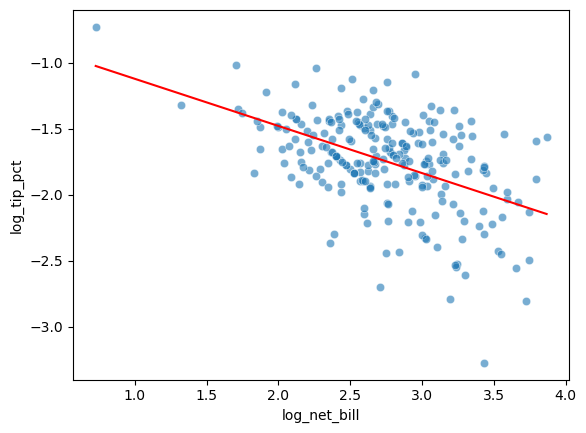

In [6]:
# 1. Carregar e preparar os dados
tips = sns.load_dataset('tips')
tips['net_bill'] = tips['total_bill'] - tips['size']   # ou conforme sua definição
tips['tip_pct'] = tips['tip'] / tips['net_bill']

df = tips[tips['tip_pct'] < 0.5].copy()

# 2. Criar as variáveis log-transformadas
df['log_tip_pct'] = np.log(df['tip_pct'])
df['log_net_bill'] = np.log(df['net_bill'])

# 3. Ajustar o modelo: log(tip_pct) ~ log(net_bill)
X = sm.add_constant(df['log_net_bill'])
y = df['log_tip_pct']
reg_loglog = sm.OLS(y, X).fit()

print(reg_loglog.summary())

# 4. Obter valores preditos e retransformar para a escala original
df['pred_log_tip_pct'] = reg_loglog.fittedvalues
df['pred_tip_pct'] = np.exp(df['pred_log_tip_pct'])  # volta à escala original

# 5. Calcular R² em termos de tip_pct
SSE = np.sum((df['tip_pct'] - df['pred_tip_pct'])**2)
SST = np.sum((df['tip_pct'] - df['tip_pct'].mean())**2)
R2_tip_pct = 1 - SSE/SST

print("R² do modelo log-log em termos de tip_pct:", R2_tip_pct)

# 6. Visualizar o ajuste
sns.scatterplot(x='log_net_bill', y='log_tip_pct', data=df, alpha=0.6)
x_seq = np.linspace(df['log_net_bill'].min(), df['log_net_bill'].max(), 100)
y_pred_log = reg_loglog.params[0] + reg_loglog.params[1]*x_seq
plt.plot(x_seq, y_pred_log, color='red', label='Ajuste log-log')
plt.legend

###  6. qual modelo resultou no melhor ajuste?

O modelo linear de tip_pct em função de net_bill apresentou o melhor ajuste (R² ≈ 0.243), seguido muito de perto pelo modelo log-log (R² ≈ 0.241). O modelo log-linear apresentou o pior desempenho (R² ≈ 0.215). Assim, a relação direta entre tip_pct e net_bill parece descrever melhor os dados, sem necessidade de transformação logarítmica